# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

571

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [10]:
city_info = []
processing_record_count = 1
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    
    try: 
        weather_check = requests.get(query_url + city).json()
        lat = weather_check["coord"]["lat"]
        Lng = weather_check["coord"]["lon"]
        temp = weather_check["main"]["temp_max"]
        hum = weather_check["main"]["humidity"]
        cloudy = weather_check["clouds"]["all"]
        wind = weather_check["wind"]["speed"]
        country = weather_check["sys"]["country"]
        date = weather_check["dt"]
    
        city_info.append({"City": city, 
                          "Lat": lat, 
                          "Lng": Lng, 
                          "Max Temp": temp,
                          "Humidity": hum,
                          "Cloudiness": cloudy,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
        print(f"Processing Record {processing_record_count} | {city}")
    
        processing_record_count += 1
    
    except:
        print("City not found. Skipping...") 
    continue

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 | new norfolk
City not found. Skipping...
Processing Record 2 | victoria
Processing Record 3 | rikitea
Processing Record 4 | punta arenas
Processing Record 5 | bredasdorp
Processing Record 6 | ryotsu
Processing Record 7 | albany
City not found. Skipping...
Processing Record 8 | kawanoe
Processing Record 9 | luderitz
Processing Record 10 | edd
Processing Record 11 | hermanus
Processing Record 12 | college
Processing Record 13 | mocuba
Processing Record 14 | nikolskoye
Processing Record 15 | kuusamo
Processing Record 16 | hithadhoo
Processing Record 17 | alta floresta
Processing Record 18 | puerto ayora
Processing Record 19 | iqaluit
Processing Record 20 | butaritari
City not found. Skipping...
Processing Record 21 | geraldton
Processing Record 22 | hervey bay
Processing Record 23 | isangel
Processing Record 24 | doha
Processing Record 25 | saint anthony
Processing Record 26 | honiara
Processing Record 27 | b

Processing Record 230 | itabira
Processing Record 231 | monmouth
Processing Record 232 | ust-kut
Processing Record 233 | beringovskiy
City not found. Skipping...
Processing Record 234 | ilulissat
Processing Record 235 | saint-paul
Processing Record 236 | general pico
Processing Record 237 | taywarah
Processing Record 238 | saint-louis
Processing Record 239 | dingle
Processing Record 240 | tautira
Processing Record 241 | karratha
Processing Record 242 | poplar bluff
City not found. Skipping...
Processing Record 243 | caravelas
Processing Record 244 | bara
Processing Record 245 | huarmey
Processing Record 246 | brae
Processing Record 247 | nouadhibou
Processing Record 248 | cap malheureux
Processing Record 249 | noumea
Processing Record 250 | rebrikha
City not found. Skipping...
Processing Record 251 | vila franca do campo
Processing Record 252 | santander
Processing Record 253 | codrington
Processing Record 254 | vredendal
Processing Record 255 | ribeira grande
Processing Record 256 | e

Processing Record 461 | keti bandar
Processing Record 462 | najran
Processing Record 463 | khartoum
Processing Record 464 | mareeba
City not found. Skipping...
Processing Record 465 | taltal
City not found. Skipping...
Processing Record 466 | machilipatnam
Processing Record 467 | luba
Processing Record 468 | belmonte
Processing Record 469 | adrar
Processing Record 470 | san francisco
Processing Record 471 | marquette
Processing Record 472 | san cristobal
Processing Record 473 | anadyr
City not found. Skipping...
Processing Record 474 | manaure
Processing Record 475 | playas
Processing Record 476 | kushmurun
Processing Record 477 | port blair
Processing Record 478 | horsham
Processing Record 479 | nueva helvecia
Processing Record 480 | beidao
Processing Record 481 | oran
Processing Record 482 | waipawa
Processing Record 483 | mahibadhoo
Processing Record 484 | teguise
Processing Record 485 | morlaix
Processing Record 486 | makakilo city
Processing Record 487 | zambezi
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_info_df = pd.DataFrame(city_info)
city_info_df.to_csv("../output_data/cities.csv")

In [12]:

city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,43.92,78,82,4.00,AU,1627165736
1,victoria,22.2855,114.1577,82.38,93,96,4.00,HK,1627165668
2,rikitea,-23.1203,-134.9692,69.26,54,0,1.43,PF,1627165737
3,punta arenas,-53.1500,-70.9167,37.51,81,75,16.11,CL,1627165445
4,bredasdorp,-34.5322,20.0403,40.32,93,15,3.44,ZA,1627165737


In [13]:
city_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,18.760013,22.073384,68.721195,71.703985,51.956357,8.067571,1.627166e+09
std,33.888912,90.886028,14.509003,19.234683,38.197157,5.528067,9.253738e+01
min,-54.800000,-175.200000,34.030000,8.000000,0.000000,0.000000,1.627165e+09
25%,-10.096850,-59.126750,58.180000,62.000000,14.000000,3.900000,1.627166e+09
50%,23.613700,24.730000,70.610000,76.000000,50.000000,6.910000,1.627166e+09
75%,46.299900,104.987650,79.870000,85.000000,90.500000,11.240000,1.627166e+09
max,78.218600,179.316700,102.780000,100.000000,100.000000,32.300000,1.627166e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

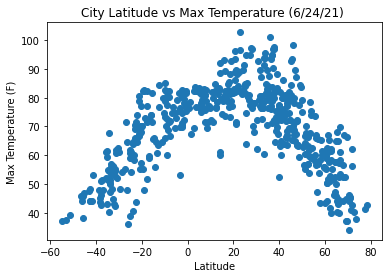

In [14]:
plt.scatter(city_info_df["Lat"],city_info_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (6/24/21) ")
plt.show()

In [15]:
# The temperatures are highiest at 40 degrees of latitude as opposed to 0 where the equater is.

## Latitude vs. Humidity Plot

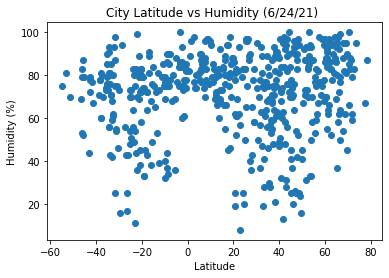

In [16]:
plt.scatter(city_info_df["Lat"],city_info_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (6/24/21) ")
plt.show()

In [17]:
# latitudes 0 to 60 degrees latitude have the highest density of high humidity.

## Latitude vs. Cloudiness Plot

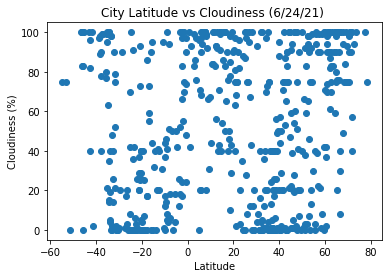

In [18]:
plt.scatter(city_info_df["Lat"],city_info_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (6/24/21) ")
plt.show()

In [19]:
#Cloudiness is evenly distributed across the latitudes.

## Latitude vs. Wind Speed Plot

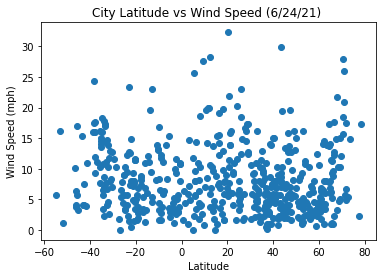

In [20]:
plt.scatter(city_info_df["Lat"],city_info_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (6/24/21) ")
plt.show()

In [ ]:
# 20 degrees latitude has the highest recorded windspeed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [56]:
northern_hemisphere_df = city_info_df.loc[city_info_df['Lat'] >= 0]
southern_hemisphere_df = city_info_df.loc[city_info_df['Lat'] <= 0]

The r-value is: -0.6501691163266115


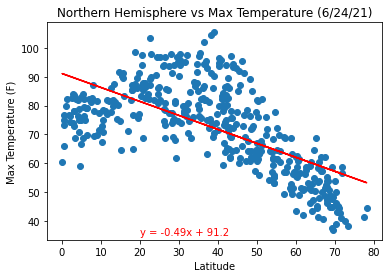

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere vs Max Temperature (6/24/21)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7755117969360276


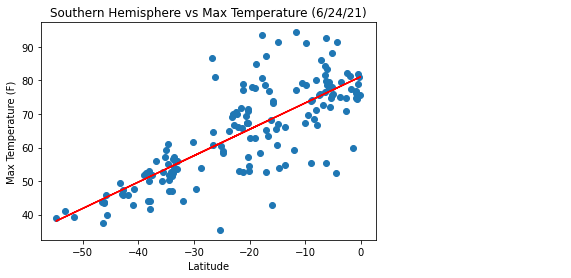

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere vs Max Temperature (6/24/21)")
plt.show()

In [ ]:
# As cities approach the eqauter thier temperatures increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011281700018920189


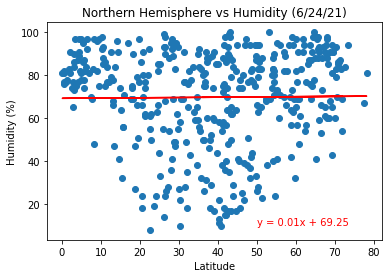

In [83]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere vs Humidity (6/24/21)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006169309916024941


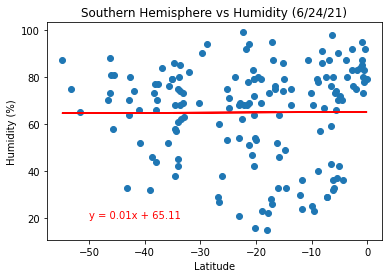

In [84]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere vs Humidity (6/24/21)")
plt.show()

In [ ]:
#Humidity is not abile to be predicted.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.025940890045002073


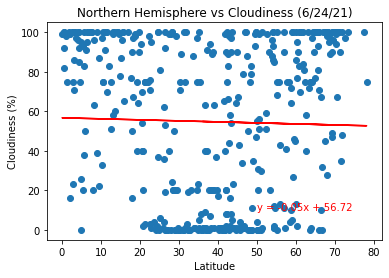

In [85]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere vs Cloudiness (6/24/21)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.14343996280647295


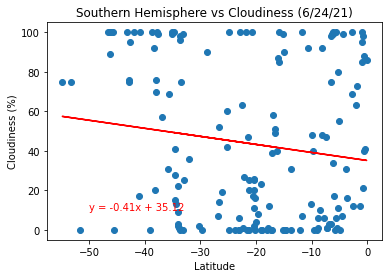

In [89]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,10), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere vs Cloudiness (6/24/21)")
plt.show()

In [ ]:
# The southern hemisphere is less cloudy than the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02846841970525132


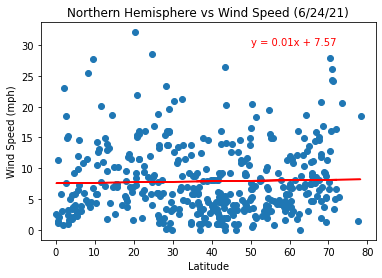

In [91]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])
regress_values = northern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"] )
plt.plot(northern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(50,30), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere vs Wind Speed (6/24/21)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.149512287128021


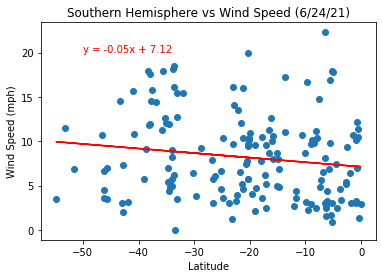

In [94]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
regress_values = southern_hemisphere_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"] )
plt.plot(southern_hemisphere_df["Lat"], regress_values, color='r')
plt.annotate(line_eq,(-50,20), color = 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere vs Wind Speed (6/24/21)")
plt.show()

In [ ]:
#The southern hemisphere is less windy than the northern hemisphere.